In [3]:
from warnings import filterwarnings

filterwarnings("ignore")

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (14,8)

In [5]:
import os

os.chdir("/workspaces/Humanitarian-activity-analysis/")

In [6]:
activity = pd.read_csv("Data/activity.csv", index_col = 'Unnamed: 0')

activity = activity.set_index("month")

activity.head()

,sessions,sessions_mapped,sessions_validated,sessions_mapped_hours,sessions_validated_hours,projects_active,projects_new,users,users_mapper,users_validator,...,cum_sessions,cum_sessions_mapped,cum_sessions_validated,cum_projects,cum_users,cum_users_mapper,cum_users_validator,cum_countries,filter,tasking_manager_dump_timestamps
month,,,,,,,,,,,,,,,,,,,,,
2012-11-01,130,97,32,194.0,64.0,2,2,12,12,1,...,130.0,97.0,32.0,2.0,12.0,12.0,1.0,2.0,all,2023-01-02 23:59:40.539208
2012-12-01,2713,2302,379,4604.0,758.0,25,24,102,97,27,...,2843.0,2399.0,411.0,26.0,108.0,104.0,28.0,8.0,all,2023-01-02 23:59:40.539208
2013-01-01,3334,3167,127,6334.0,254.0,41,23,120,115,27,...,6177.0,5566.0,538.0,49.0,200.0,191.0,53.0,11.0,all,2023-01-02 23:59:40.539208
2013-02-01,2742,2310,333,4620.0,666.0,54,35,186,174,38,...,8919.0,7876.0,871.0,84.0,328.0,312.0,83.0,16.0,all,2023-01-02 23:59:40.539208
2013-03-01,2167,1629,483,3258.0,966.0,42,17,163,153,34,...,11086.0,9505.0,1354.0,101.0,429.0,410.0,107.0,18.0,all,2023-01-02 23:59:40.539208


In [8]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 2012-11-01 to 2023-01-01
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sessions                         123 non-null    int64  
 1   sessions_mapped                  123 non-null    int64  
 2   sessions_validated               123 non-null    int64  
 3   sessions_mapped_hours            123 non-null    float64
 4   sessions_validated_hours         123 non-null    float64
 5   projects_active                  123 non-null    int64  
 6   projects_new                     123 non-null    int64  
 7   users                            123 non-null    int64  
 8   users_mapper                     123 non-null    int64  
 9   users_validator                  123 non-null    int64  
 10  users_new                        123 non-null    int64  
 11  users_new_mapper                 123 non-null    int64  
 12  users_new_v

In [14]:
def timeplot(df, cols, title, ylab = "# of sessions"):
    
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.size"] = 16
    plt.rcParams["figure.figsize"] = (14,8)
    df[cols].plot()
    plt.ylabel(ylab)
    plt.xticks(rotation = 45)
    plt.title(title)

    plt.show()

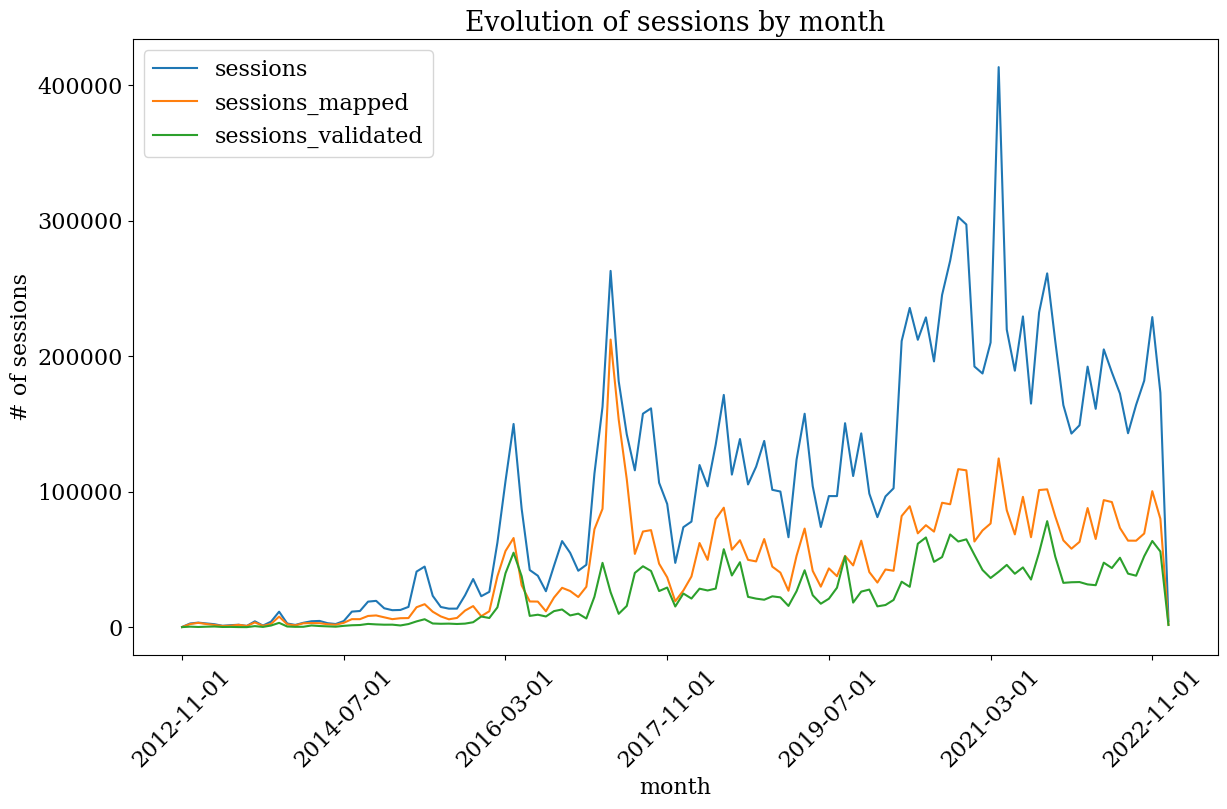

In [15]:
timeplot(activity,['sessions','sessions_mapped','sessions_validated'],
        title= "Evolution of sessions through the months" )

Through the time, the sessions for mapping is highest in each point in constraint of session's validated that are the right metrics of success of hummanitarian project and the implication of users.

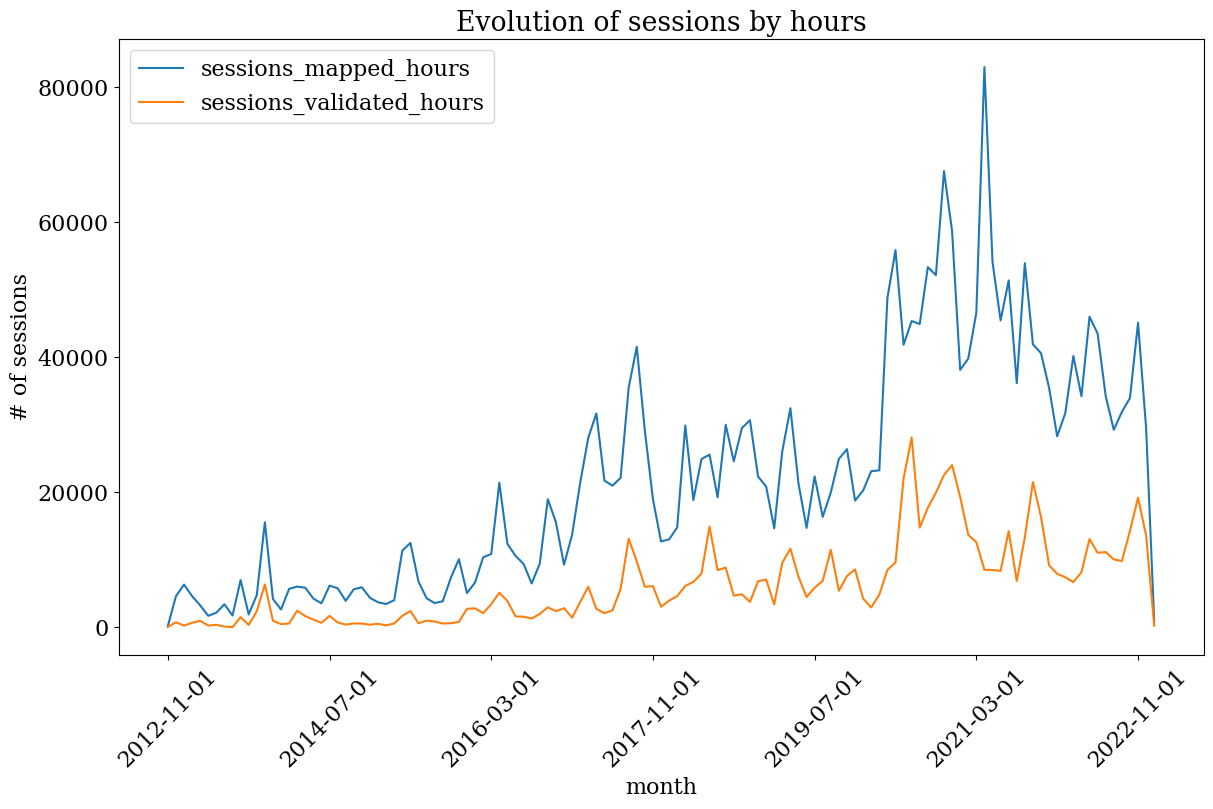

In [16]:
timeplot(activity,['sessions_mapped_hours', 'sessions_validated_hours'],
         title= "Evolution of sessions through the months" )

As the previous plot the both time series are strongly correlated as their evolution in each time follow the same trend. But always the sessions validated as conversion rate is under mapped sessions.

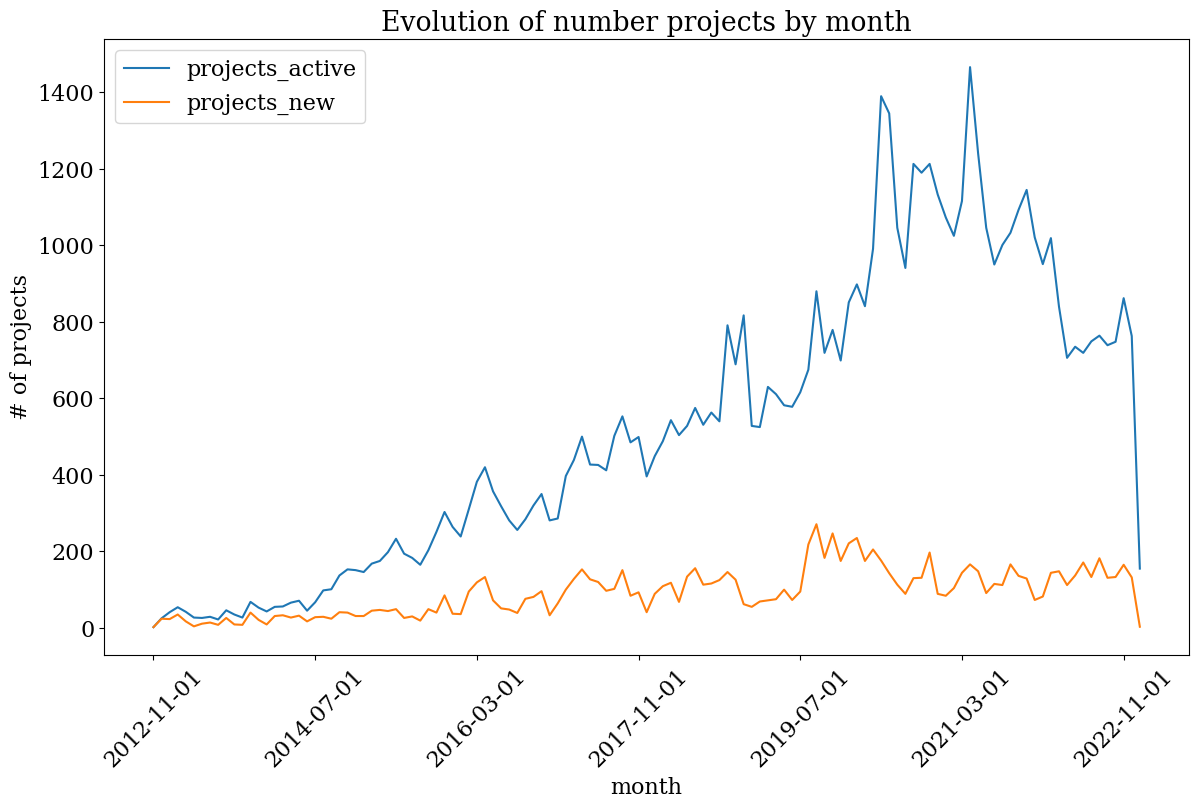

In [18]:
timeplot(activity,['projects_active','projects_new'],
        title = "Evolution of number projects through the months",
        ylab = "# of projects")

In this plot, we can notice the growing trend for active project but the new projects didn't follow this trend then we can conclude that orgnisation accumulate active projects due to low conversion rate to complete quickly the projects because the validated are very low. To take in account the environment, as in the google Covid-19 start 16 November 2019 and that affect all the world and impact society and change millions person's plan, we can haven't collected data to validate this hypothesis but the peek of active project is reached at Covid-19 period.

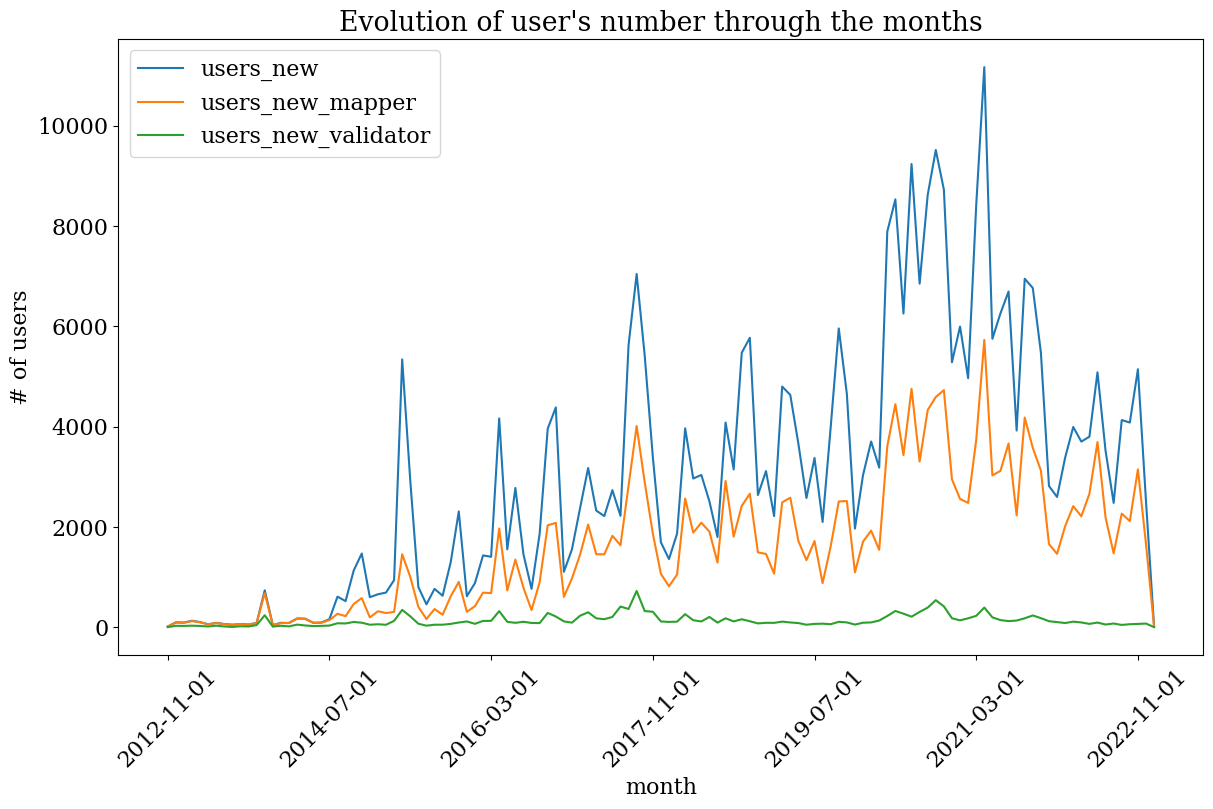

In [22]:
timeplot(activity,['users_new','users_new_mapper', 'users_new_validator'],
       title = "Evolution of user's number through the months",
       ylab = "# of users")